# Import

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA 


# Bench Function

In [18]:
# Compute some unsupervised score for the given model
def bench_k_means(estimator, data, y=None):
    estimator.fit(data)
    scores = [
        "adjusted_rand_score",
        "adjusted_mutual_info_score",
        "silhouette_score",
        "homogeneity_score",
        "completeness_score",
        "v_measure_score",
    ]

    results = []
    for s in scores:
        if s not in ["silhouette_score"]:
            # with ground-truth
            # Yeah !
            score = getattr(metrics, s)(y, estimator.labels_)
        elif y is not None:
            # with NO ground-truth
            score = getattr(metrics, s)(data, estimator.labels_)
        else:
            continue
            
        results.append(score)
        
    return pd.DataFrame([results], columns=scores, index=["result"])

# Load Data

In [19]:
raw_data = fetch_20newsgroups(shuffle=False,remove=('headers', 'footers', 'quotes'))
data = raw_data.data
y = raw_data.target
K = len(np.unique(y))

# Traning the Models

Vectorizer was used to transforme the Text into Vectors.
* min_df = 2 to consider only words that appears more than 1 time inside each vector
* stop_words to not take in consideration words lie "you, him, he"
* analyzer = 'word'. I my understanding this parameter is necessary in order to
    get a better efficiency from stop_words

In [20]:
tfif = TfidfVectorizer(min_df=2, stop_words='english', analyzer='word')
X = tfif.fit_transform(data)

TruncatedSVD was used to reduce the dimension using from the parce matrix obtained from TfidfVectorizer.fit_transform

In [21]:
lsa = TruncatedSVD(n_components=100, random_state=42)
X_lsa = lsa.fit_transform(X)

Then I used PCA to reduce to a centered lower dimensional space 

In [22]:
pca = PCA(2) 
reduced_data = pca.fit_transform(X_lsa) 

Traning the model with KMeans

In [23]:
kmeans_pca = KMeans(init='k-means++',n_clusters=K, random_state=42)
X_kmeans_pca = kmeans_pca.fit_transform(reduced_data)


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


It's just an array of colors to be used with plt.scatter

In [24]:
colors_hex = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#800000",  # Brown
    "#008000",  # Dark Green
    "#000080",  # Dark Blue
    "#808000",  # Dark Yellow
    "#800080",  # Dark Magenta
    "#008080",  # Dark Cyan
    "#FF8000",  # Orange
    "#80FF00",  # Light Green
    "#0080FF",  # Light Blue
    "#FF0080",  # Pink
    "#8000FF",  # Purple
    "#FF8080",  # Light Pink
    "#80FF80",  # Light Green
    "#8080FF"   # Light Blue
]


Prediction from Kmeans and plot with plt.scatter

c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


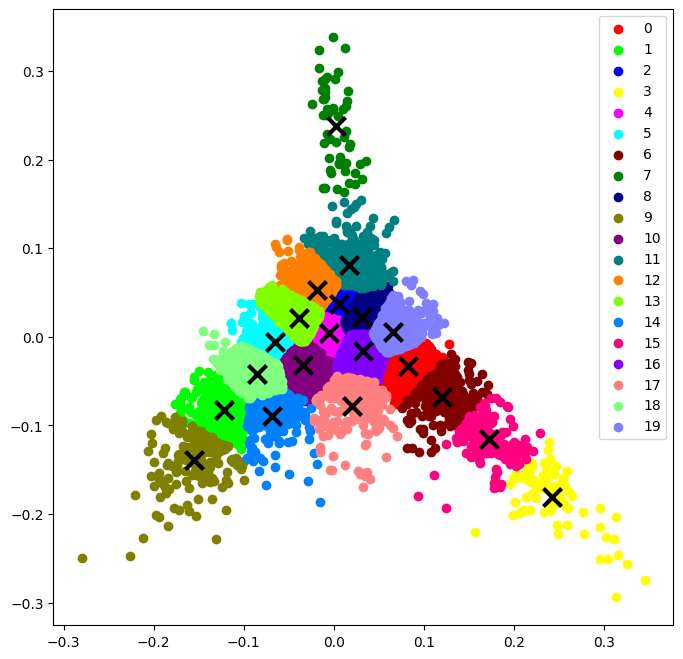

In [25]:
kmeans_cluster = kmeans_pca.fit_predict(reduced_data) 
  
# Calculating the centroids 
centroids = kmeans_pca.cluster_centers_ 
label = kmeans_pca.fit_predict(reduced_data) 
unique_labels = np.unique(label) 
  
# plotting the clusters: 
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(reduced_data[label == i, 0], 
                reduced_data[label == i, 1], 
                label=i, c=colors_hex[i]) 
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.legend() 
plt.show() 

To a better comparation all the custers are listed below, with a sample of 10 words per cluster

In [26]:
kmeans = KMeans(init='k-means++',n_clusters=K, random_state=42)
X_kmeans = kmeans.fit_transform(X_lsa)

c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
original_space_centroids = lsa.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = tfif.get_feature_names_out()

for i in range(K):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
        
    print()

Cluster 0: just like edu use new good time know does ve 
Cluster 1: ax max believe hi b8f dos g9v wrong a86 anybody 
Cluster 2: windows dos ms version running drivers driver thanks using os 
Cluster 3: people don think just like know government gun say right 
Cluster 4: 00 50 20 sale shipping dos price 15 10 30 
Cluster 5: car cars engine like dealer good miles speed new just 
Cluster 6: file files ftp program windows directory format use zip image 
Cluster 7: key chip encryption clipper keys government escrow algorithm use public 
Cluster 8: card monitor video bus mac vga memory apple ram use 
Cluster 9: armenian armenians turkish genocide armenia turkey turks people government soviet 
Cluster 10: bike bikes ride motorcycle riding dod miles honda helmet like 
Cluster 11: geb dsl cadre n3jxp chastity pitt shameful intellect skepticism surrender 
Cluster 12: drive scsi drives hard disk ide controller floppy cd hd 
Cluster 13: god believe jesus bible faith people christ hell does existen

In [28]:
bench_k_means(kmeans, X_lsa, y).round(2)

c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,homogeneity_score,completeness_score,v_measure_score
result,0.05,0.3,0.07,0.26,0.39,0.31
